In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_heatmap(n, drug_A='', drug_B='', Title = ''):
       
    
    j = 1
    for i in n.min():
        if j > i:
            j= i
    if j < 0:
        hmin = 0
    else:
        hmin = round(j,2)
    hmax = 1
    fig = plt.figure(figsize=(8, 10))
    
    fig=sns.heatmap(n, linewidths=.8, cmap='RdYlBu_r',cbar_kws={'ticks':[0,0.5,1],'orientation':'horizontal', 'shrink': .5,"label": "Relative CTG Intensity"},vmin = 0, vmax=1, center = 0.5)
    
    plt.xticks(rotation="45")
    plt.yticks(rotation="0")

    fig.set_ylabel(drug_A + ' (uM)',fontsize = 15)
    
    fig.set_xlabel (drug_B + ' (uM)', fontsize = 15)
    fig.set_title(Title + '\n', fontsize =25)
    return fig
          
        

In [3]:
K = pd.DataFrame()
# starting dose (uM), dilution Factor, steps defult value for starting = 10uM, dilution factor = 3 , steps = 9
def get_dose(starting = 10, d_factor = 3 , steps = 9, end = 0):
    Dose = [starting]
    for i in range(0, steps-1,1):
        Dose.append(round(Dose[-1]/d_factor,4))
    Dose.append(0)
    return Dose
    
Dose = get_dose()

In [4]:
Dose_rev = []
for i in range(-1,-len(Dose)-1,-1):
    Dose_rev.append(Dose[i])

In [5]:
Dose_rev

[0, 0.0015, 0.0046, 0.0137, 0.0412, 0.1235, 0.3704, 1.1111, 3.3333, 10]

In [6]:
def getavg_ctgfile(filename):
    file = pd.read_csv(filename,sep = 'delimiter', header = None)
    M = file[0][2:18]
    T = []
    for i in M:
        T.append(i.split(','))
    K = pd.DataFrame(T, columns=['A','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
    K = K.set_index('A')
    K1 = K[['3','4','5','6','7','8','9','10','11','12']]
    K2 = K[['13','14','15','16','17','18','19','20','21','22']]
    new_df1 = K1.drop(K1.index[[0,1,2,3,-2,-1]])
    new_df2 = K2.drop(K2.index[[0,1,2,3,-2,-1]])
    new_df1 = new_df1.astype('int64')
    
    new_df2 = new_df2.astype('int64')
    #normalize values to DMSO well
    return new_df1, new_df2

In [7]:
def save_heatmap(n, drug_A='', drug_B='', Title = '', num = ''):
       
    
    fig = plt.figure(figsize=(8, 10))
    
    fig=sns.heatmap(n, linewidths=.8, cmap = 'RdYlBu_r', cbar_kws={'ticks':[0, 0.5, 1],'orientation':'horizontal', 'shrink': .5,"label": "Relative CTG Intensity"},vmin = 0, vmax=1, center = 0.5)
    
    plt.xticks(rotation="45")
    plt.yticks(rotation="0")

    fig.set_ylabel(drug_A + ' (uM)',fontsize = 15)
    
    fig.set_xlabel (drug_B + ' (uM)', fontsize = 15)
    fig.set_title(Title + '\n', fontsize =25)
       

    plt.savefig('./dummy/new/{0}.png'.format(Title+"_"+drug_A+'_'+drug_B+'_CTG_'+num), dpi=300, bbox_inches='tight',facecolor='w')
    plt.show()
    return 

In [18]:
def get_everything_save(plate=1, file=1):
    for i in range(1,plate+1):
        globals()['Platee{0}a'.format(i)],globals()['Platee{0}b'.format(i)] = ctgfile('./Nivo/8-27-21/CP-3-{0}.csv'.format(file))
        file = file+2
    
    for i in range(1,plate+1):
        if file%2 == 0:
            save_heatmap(eval('Platee{0}a'.format(i)),even_drugA,even_drugB,cell_line,str(i))
            save_heatmap(eval('Platee{0}b'.format(i)),even_drugA,even_drugC,cell_line,str(i))
        elif file%2 != 0:
            save_heatmap(eval('Platee{0}a'.format(i)),odd_drugA,odd_drugB,cell_line,str(i))
            save_heatmap(eval('Platee{0}b'.format(i)),odd_drugA,odd_drugC,cell_line,str(i))



In [17]:
def not_even_or_odd_get_everything_save(plate=1, file=1):
    for i in range(1,plate+1):
        globals()['Platee{0}a'.format(i)],globals()['Platee{0}b'.format(i)] = ctgfile('./Nivo/8-27-21/CP-3-{0}.csv'.format(file))
        file = file + 1
    
    for i in range(1,plate+1):
        if file <= 4:
            save_heatmap(eval('Platee{0}a'.format(i)),first_drugA,first_drugB,first_cell_line,str(i))
            save_heatmap(eval('Platee{0}b'.format(i)),first_drugA,first_drugC,first_cell_line,str(i))
        elif file > 4:
            save_heatmap(eval('Platee{0}a'.format(i)),second_drugA,second_drugB,second_cell_line,str(i))
            save_heatmap(eval('Platee{0}b'.format(i)),second_drugA,second_drugC,second_cell_line,str(i))


In [10]:
def ctgfile(filename):
    file = pd.read_csv(filename,sep = 'delimiter', header = None)
    M = file[0][2:18]
    T = []
    for i in M:
        T.append(i.split(','))
    K = pd.DataFrame(T, columns=['A','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
    K = K.set_index('A')
    K1 = K[['3','4','5','6','7','8','9','10','11','12']]
    K2 = K[['13','14','15','16','17','18','19','20','21','22']]
    new_df1 = K1.drop(K1.index[[0,1,2,3,-2,-1]])
    new_df2 = K2.drop(K2.index[[0,1,2,3,-2,-1]])
    new_df1 = new_df1.astype('int64')
    
    new_df2 = new_df2.astype('int64')
    #normalize values to DMSO well
    new_df1_dm = new_df1/(new_df1['12']['M'])
    new_df1_dm = new_df1_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    new_df2_dm = new_df2/new_df2['22']['M']
    new_df2_dm = new_df2_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    
    
    
    
    
    
    
    return flip_table(new_df1_dm), flip_table(new_df2_dm)


In [11]:
### needs to be changed for different screening with different drugs
cell_line = 'SKOV3'
first_cell_line = 'SKOV3'
second_cell_line = 'SKOV3'

first_drugA = 'Cisplatin'
first_drugB = 'taselisib'
first_drugC = 'axitinib'

second_drugA = '2-96'
second_drugB = 'Trametinib'
second_drugC = '9-95-1'

odd_drugA = '2-96'
odd_drugB = 'Trametinib'
odd_drugC = '9-95-1'

even_drugA = 'Taselisib'
even_drugB = 'Trametinib'
even_drugC = 'Mocetinostat'

In [237]:
###for i in range(3):
###    globals()['Platee{0}a'.format(i)] = 'Hello'

In [16]:
### number of plates and file number is equal to plate number
def get_everything(plate=1, file=1):
    for i in range(1,plate+1):
        globals()['Platee{0}a'.format(i)],globals()['Platee{0}b'.format(i)] = ctgfile('./Nivo/8-27-21/CP-3-{0}.csv'.format(file))
        file = file+2
    
    for i in range(1,plate+1):
        if file%2 == 0:
            get_heatmap(eval('Platee{0}a'.format(i)),even_drugA,even_drugB,cell_line)
            get_heatmap(eval('Platee{0}b'.format(i)),even_drugA,even_drugC,cell_line)
        elif file%2 != 0:
            get_heatmap(eval('Platee{0}a'.format(i)),odd_drugA,odd_drugB,cell_line)
            get_heatmap(eval('Platee{0}b'.format(i)),odd_drugA,odd_drugC,cell_line)

            
        
        
        
        
        

In [19]:
def avg_everything(plate=1, file=1):
    for i in range(1,plate+1):
        globals()['Platee{0}a'.format(i)],globals()['Platee{0}b'.format(i)] = getavg_ctgfile('./Nivo/8-27-21/CP-3-{0}.csv'.format(file))
        file = file+2
    Plate_a_avg = Platee1a
    Plate_b_avg = Platee1b
    for i in range(1,plate):
        Plate_a_avg = Plate_a_avg + eval('Platee{0}a'.format(i+1))
        Plate_b_avg = Plate_b_avg + eval('Platee{0}b'.format(i+1))
    Plate_a_avg = Plate_a_avg/plate
    Plate_a_avg_dm = Plate_a_avg/Plate_a_avg['12']['M']
    Plate_a_avg_dm = Plate_a_avg_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    Plate_b_avg = Plate_b_avg/plate
    Plate_b_avg_dm = Plate_b_avg/Plate_b_avg['22']['M']
    Plate_b_avg_dm = Plate_b_avg_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    if file%2 == 0:
        save_heatmap(flip_table(Plate_a_avg_dm),even_drugA,even_drugB,cell_line,'avg')
        save_heatmap(flip_table(Plate_b_avg_dm),even_drugA,even_drugC,cell_line,'avg')
    elif file%2 != 0:
        save_heatmap(flip_table(Plate_a_avg_dm),odd_drugA,odd_drugB,cell_line,'avg')
        save_heatmap(flip_table(Plate_b_avg_dm),odd_drugA,odd_drugC,cell_line,'avg')

In [20]:
def avg_everything_first(plate=1, file=1):
    for i in range(1,plate+1):
        globals()['Platee{0}a'.format(i)],globals()['Platee{0}b'.format(i)] = getavg_ctgfile('./Nivo/8-27-21/CP-3-{0}.csv'.format(file))
        file = file+1
    Plate_a_avg = Platee1a
    Plate_b_avg = Platee1b
    for i in range(1,plate):
        Plate_a_avg = Plate_a_avg + eval('Platee{0}a'.format(i+1))
        Plate_b_avg = Plate_b_avg + eval('Platee{0}b'.format(i+1))
    Plate_a_avg = Plate_a_avg/plate
    Plate_a_avg_dm = Plate_a_avg/Plate_a_avg['12']['M']
    Plate_a_avg_dm = Plate_a_avg_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    Plate_b_avg = Plate_b_avg/plate
    Plate_b_avg_dm = Plate_b_avg/Plate_b_avg['22']['M']
    Plate_b_avg_dm = Plate_b_avg_dm.apply(lambda x: [y if y <=1 else 1 for y in x])
    if file <= 4:
        save_heatmap(flip_table(Plate_a_avg_dm),first_drugA,first_drugB,first_cell_line,'avg')
        save_heatmap(flip_table(Plate_b_avg_dm),first_drugA,first_drugC,first_cell_line,'avg')
    elif file > 4:
        save_heatmap(flip_table(Plate_a_avg_dm), second_drugA,second_drugB,second_cell_line,'avg')
        save_heatmap(flip_table(Plate_b_avg_dm),second_drugA,second_drugC,second_cell_line,'avg')

<ipython-input-6-5c74cad6debc>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


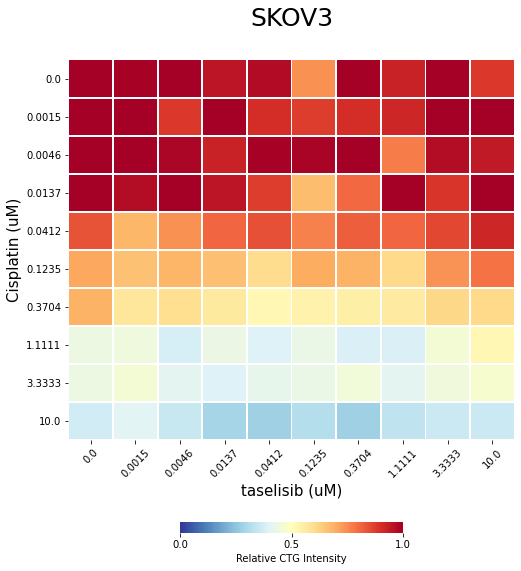

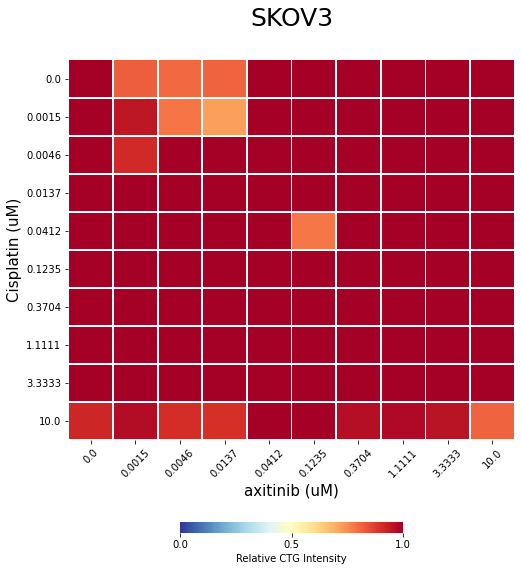

In [24]:
avg_everything_first(3,1)

<ipython-input-5-5c74cad6debc>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


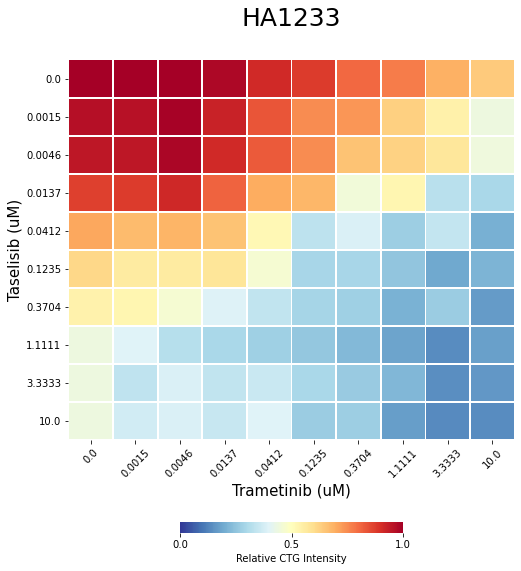

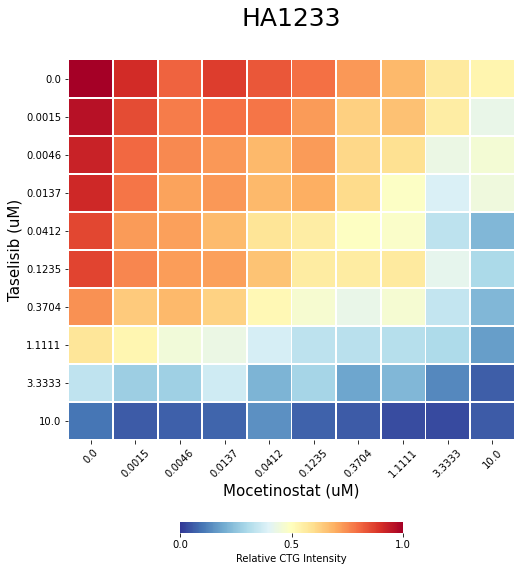

In [19]:
avg_everything(3,8)

In [23]:
get_heatmap(table_a)

NameError: name 'table_a' is not defined

In [25]:
def flip_table(table):
    table.columns = Dose
    table.index = Dose
    table = table.reindex(columns=Dose_rev, index= Dose_rev)
    table=table.apply(lambda x: [y if y >= 0 else 0 for y in x])
    return table

<ipython-input-8-404207ba37fd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


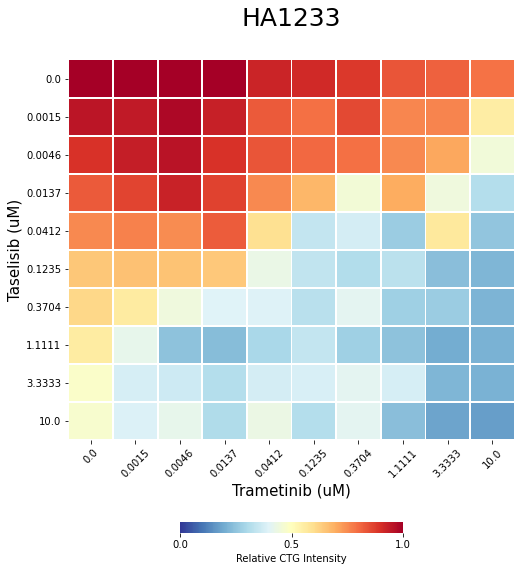

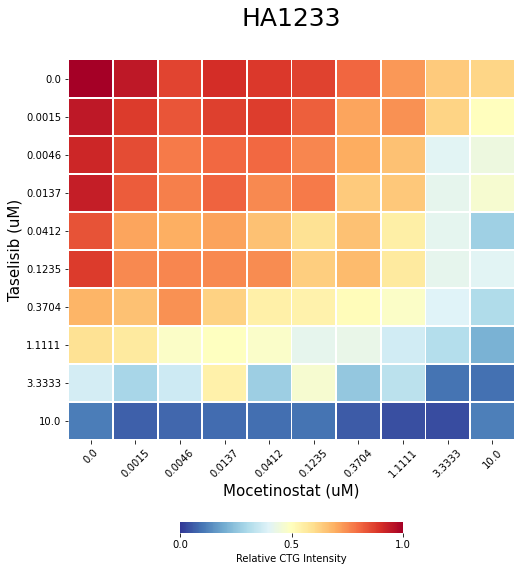

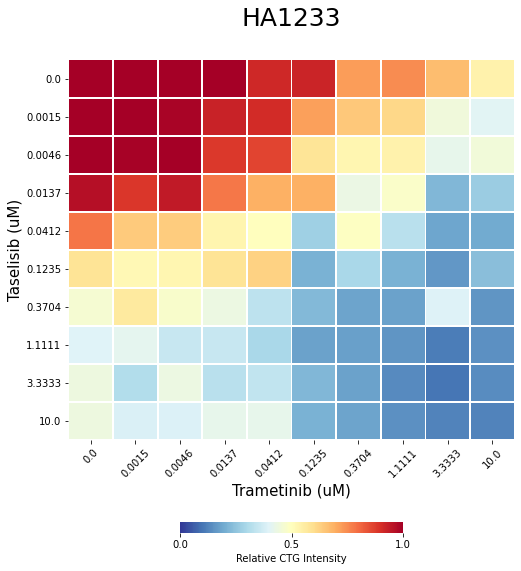

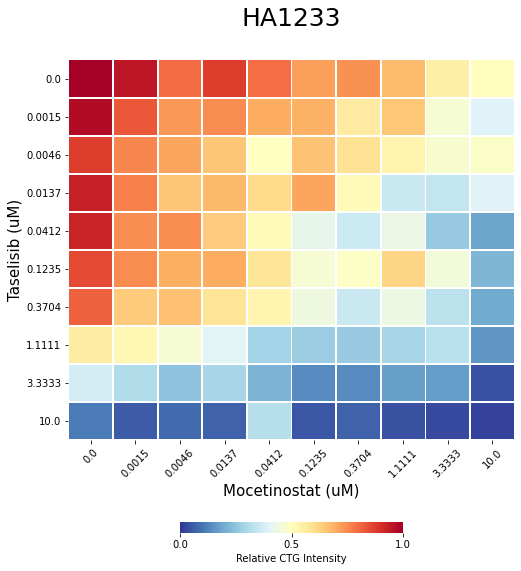

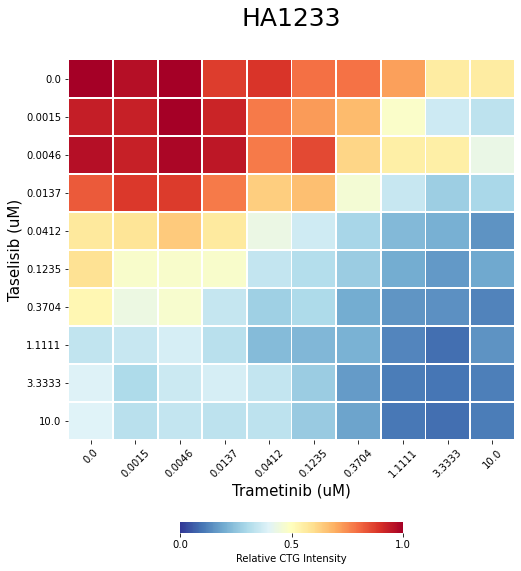

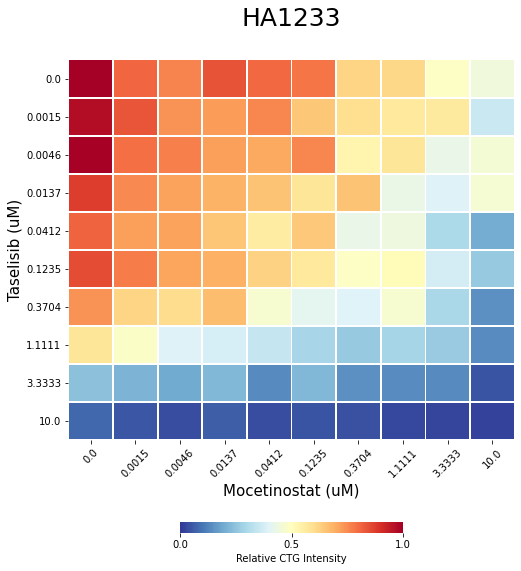

In [21]:
get_everything_save(3,8)

In [298]:
Platee1b

,0.0000,0.0015,0.0046,0.0137,0.0412,0.1235,0.3704,1.1111,3.3333,10.0000
0.0000,1.000000,0.993243,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.0015,0.966696,0.871035,1.000000,0.918092,0.889593,1.000000,0.990224,0.901670,1.000000,0.956036
0.0046,1.000000,0.934514,1.000000,1.000000,0.930132,1.000000,0.990150,0.950991,0.939246,0.989377
0.0137,0.970009,0.944456,1.000000,0.958834,0.989580,0.938159,0.987794,1.000000,1.000000,1.000000
0.0412,0.964560,0.921811,0.928715,0.949206,0.887733,0.964118,0.948009,0.913471,0.839608,0.930169
0.1235,0.853048,0.825064,0.877000,0.755417,0.742254,0.702542,0.619788,0.598413,0.515695,0.396911
0.3704,0.291272,0.426717,0.421691,0.348123,0.413112,0.287461,0.681573,0.294125,0.150763,0.141190
1.1111,0.138686,0.110684,0.092973,0.092476,0.107591,0.093102,0.096489,0.110923,0.085185,0.080122
3.3333,0.088904,0.071690,0.061877,0.094593,0.098919,0.080306,0.111954,0.069960,0.065836,0.063792
10.0000,0.104277,0.081558,0.071966,0.074507,0.077471,0.066259,0.070309,0.075888,0.068395,0.079220


<ipython-input-269-404207ba37fd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


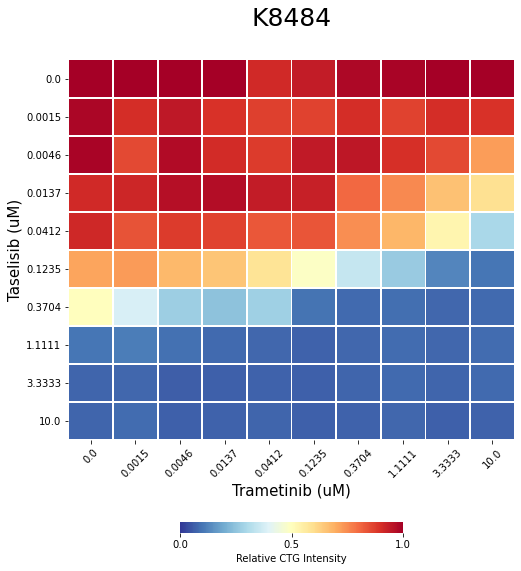

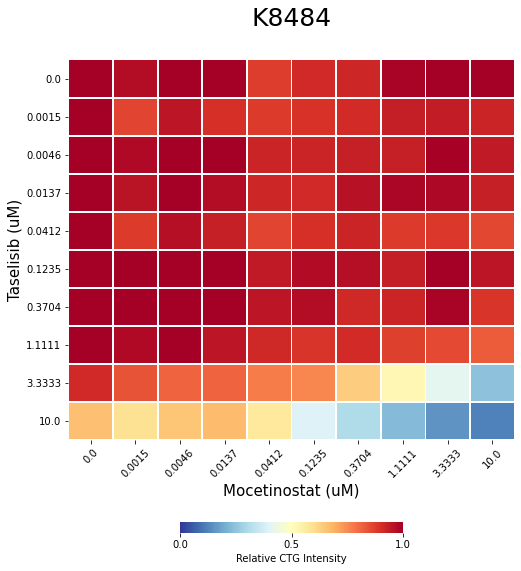

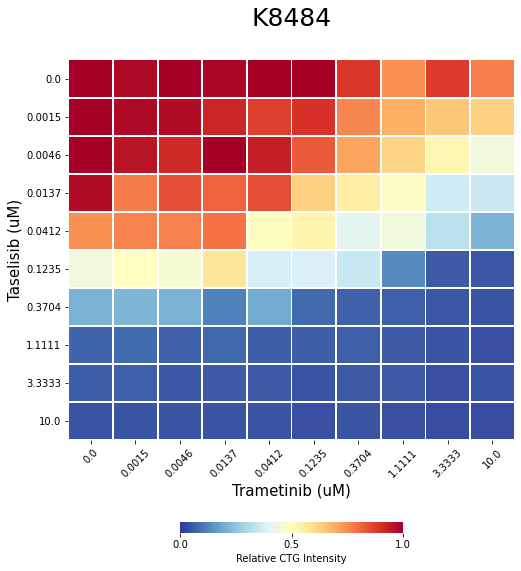

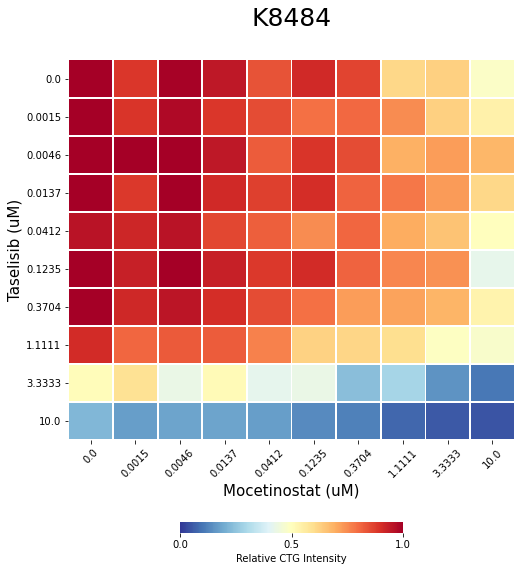

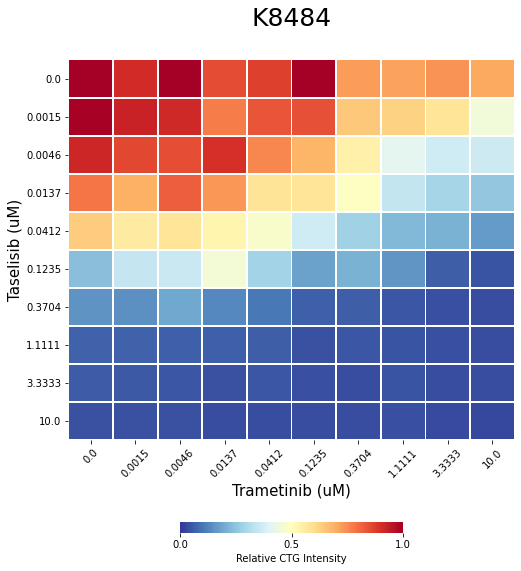

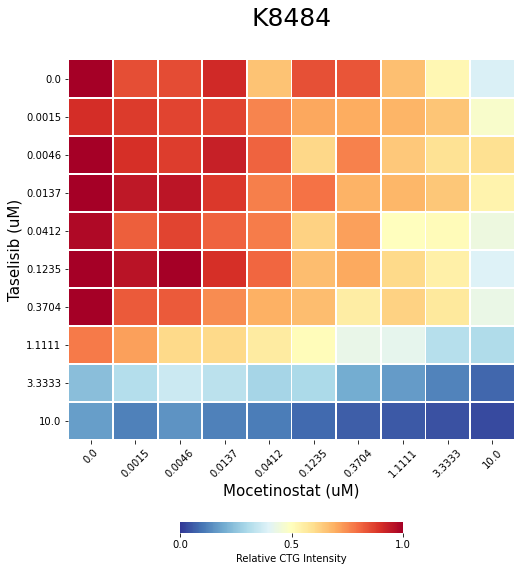

In [289]:
get_everything_save(3,8)

<ipython-input-10-404207ba37fd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


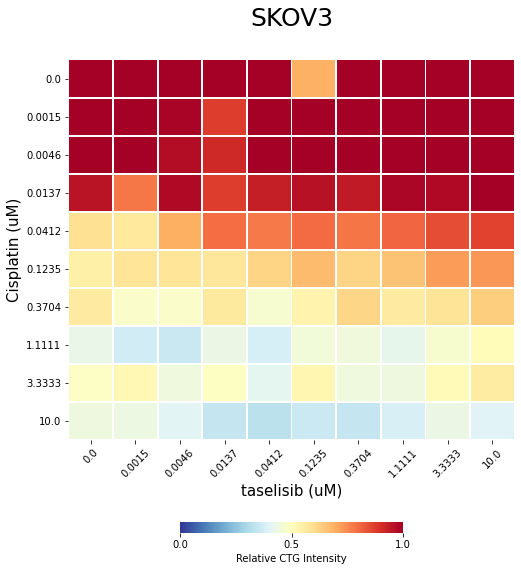

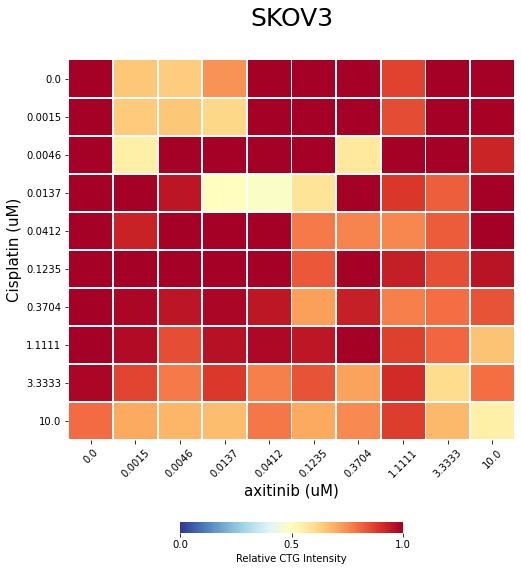

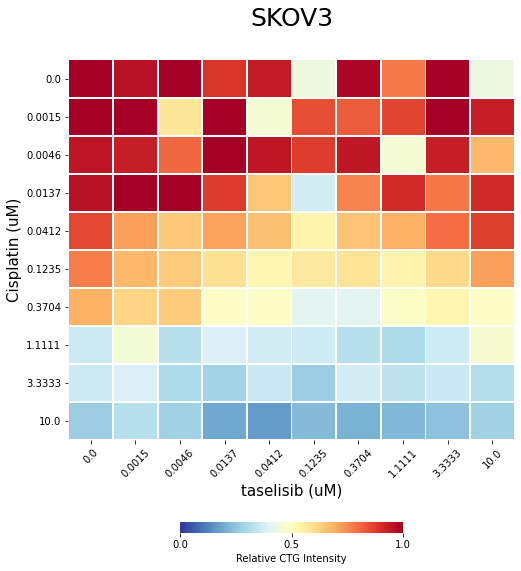

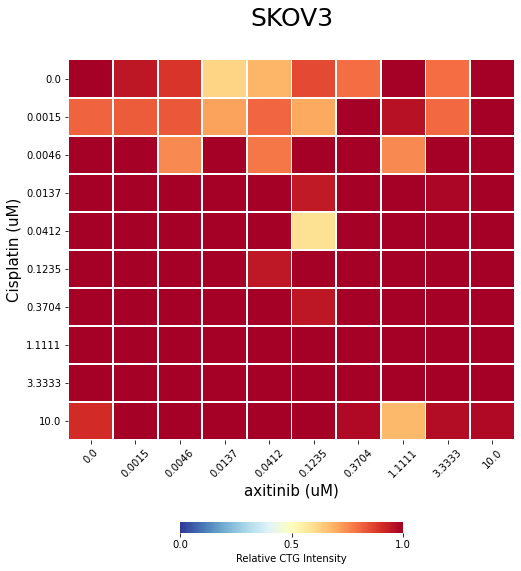

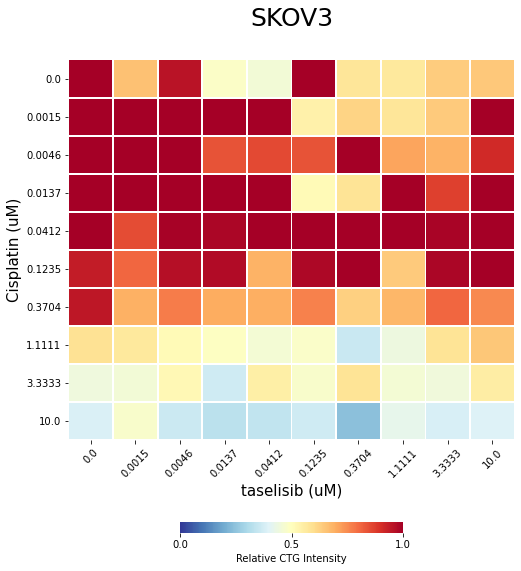

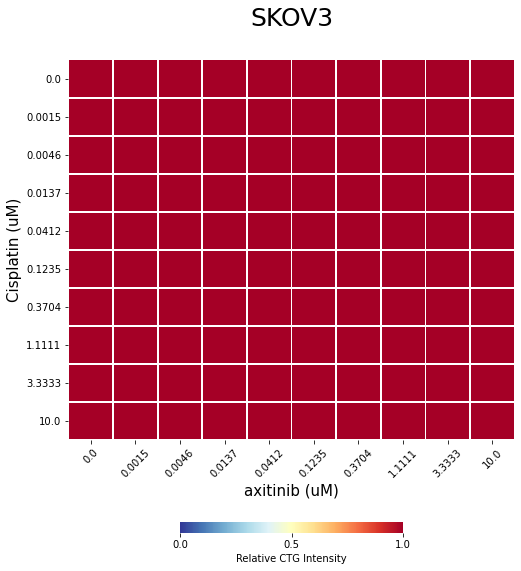

In [26]:
not_even_or_odd_get_everything_save(3,1)

<ipython-input-295-404207ba37fd>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


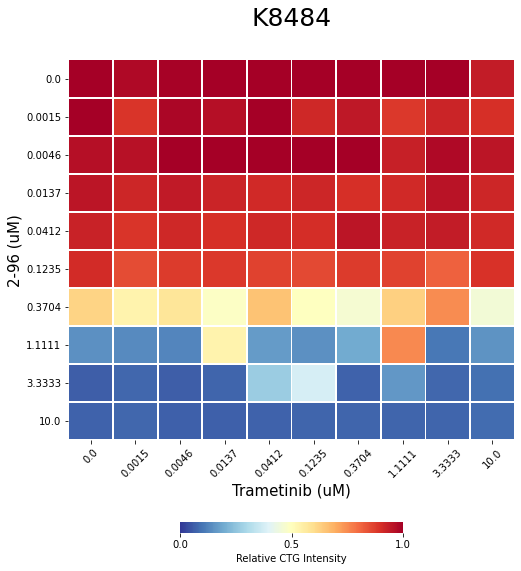

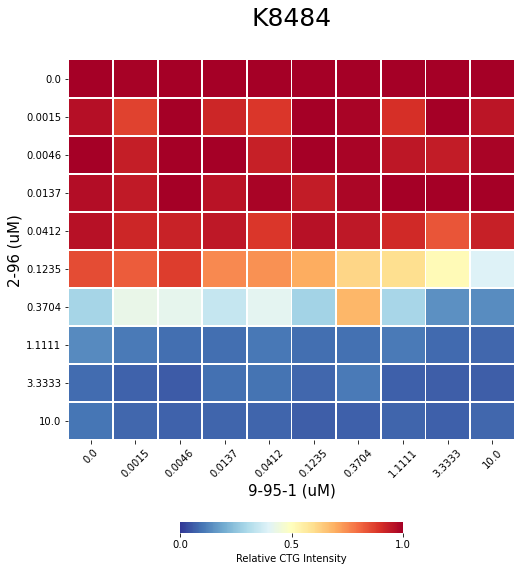

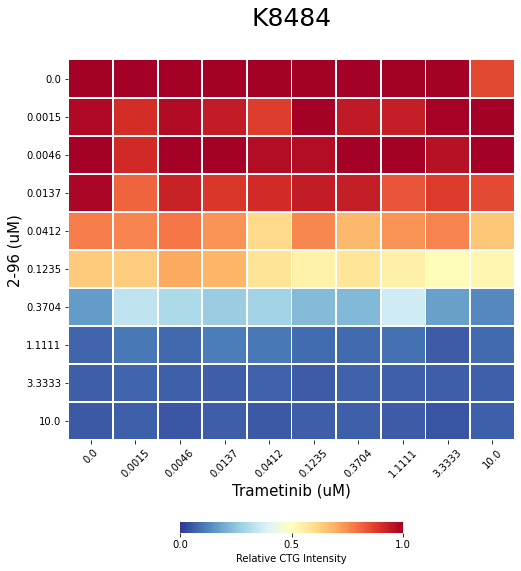

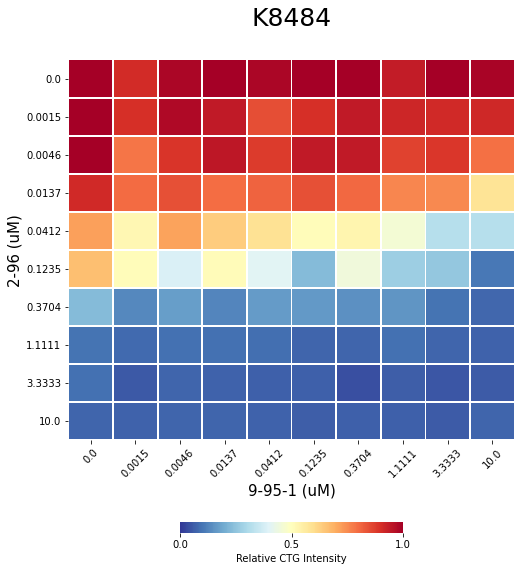

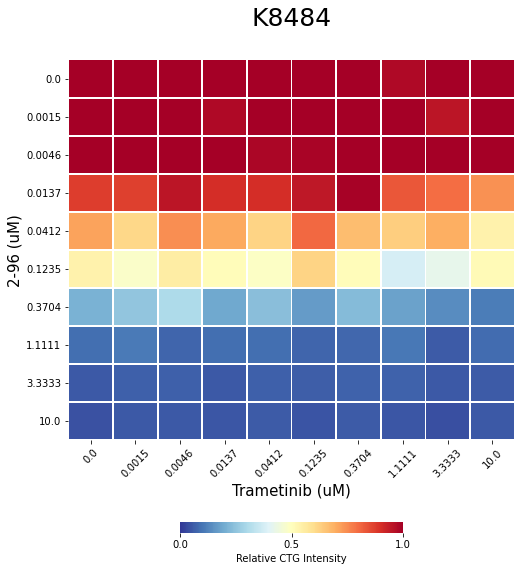

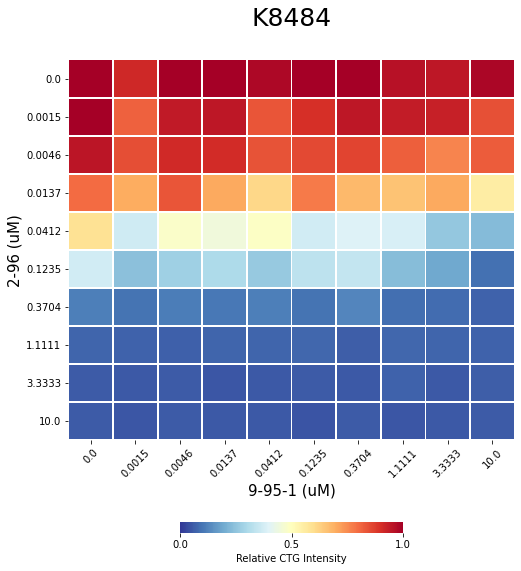

In [296]:
get_everything(3,7)

In [265]:
Plate1a, Plate1b = ctgfile('./Nivo/8-16-21/CP-3-7.csv')

<ipython-input-4-69a8d5efa606>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


In [251]:
Platee2a

'Hello'

In [243]:
Platee1a

'Hello'

In [217]:
trying_a, trying_b = continuting(8)

<ipython-input-149-5c74cad6debc>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


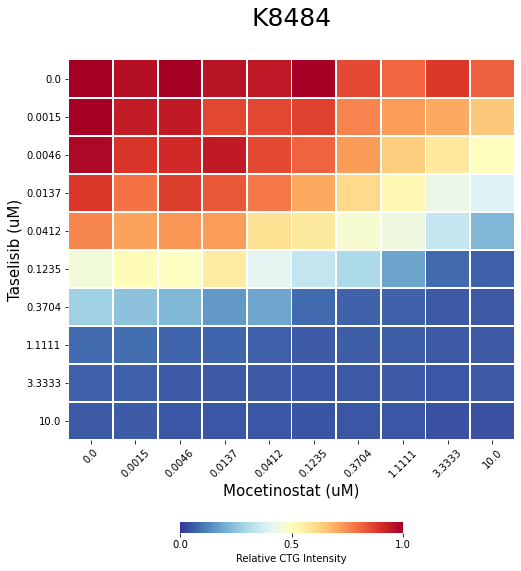

In [223]:
save_heatmap(flip_table(trying_a), even_drugA,even_drugC,cell_line, 'avg') 

In [155]:
trying_b

,13,14,15,16,17,18,19,20,21,22
A,,,,,,,,,,
D,4172.333333,5191.000000,7335.666667,9925.666667,12297.000000,17115.666667,19412.666667,19820.333333,17672.666667,21345.333333
E,8824.666667,14055.333333,20190.000000,21852.666667,30793.333333,30511.000000,34373.000000,33099.333333,36187.000000,33851.333333
F,33188.000000,34394.000000,39286.666667,40526.666667,42422.333333,47192.333333,50416.000000,51360.000000,53062.666667,59180.666667
G,38534.333333,46938.000000,47760.000000,46174.333333,51392.666667,52982.333333,57539.666667,60073.666667,58412.000000,69322.333333
H,36364.000000,47967.000000,48618.333333,52646.666667,54017.000000,56194.666667,61155.000000,68337.666667,62646.666667,75697.333333
I,37524.666667,43031.666667,43714.000000,52162.666667,48156.666667,52577.000000,55648.333333,59567.666667,56093.000000,63904.333333
J,43539.666667,49665.000000,51721.000000,52198.000000,55678.666667,54556.000000,59058.000000,66227.666667,59785.000000,71252.666667
K,46648.000000,48396.666667,47887.000000,54261.666667,51396.000000,54610.666667,61730.333333,63031.666667,61646.000000,72383.000000
L,40460.333333,46837.000000,50141.000000,51195.333333,50895.666667,53244.000000,56865.333333,59865.000000,56655.333333,62211.000000


In [264]:
Plate1a, Plate1b = ctgfile('./Nivo/8-16-21/CP-3-7.csv')
Plate2a, Plate2b = ctgfile('./Nivo/8-16-21/CP-3-9.csv')
Plate3a, Plate3b = ctgfile('./Nivo/8-16-21/CP-3-11.csv')

<ipython-input-4-69a8d5efa606>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(filename,sep = 'delimiter', header = None)


In [61]:
Plate_a_avg = (Plate1a+Plate3a+Plate5a)/3

In [62]:
Plate_b_avg = (Plate1b+ Plate3b+ Plate5b)/3

In [224]:
odd_drugA = '2-96'
odd_drugB = 'Trametinib'
odd_drugC = '9-95-1'
cell_line = 'K8484'
even_drugA = 'Taselisib'
even_drugB = 'Trametinib'
even_drugC = 'Mocetinostat'

<AxesSubplot:title={'center':'K8484\n'}, xlabel='Trametinib (uM)', ylabel='Taselisib (uM)'>

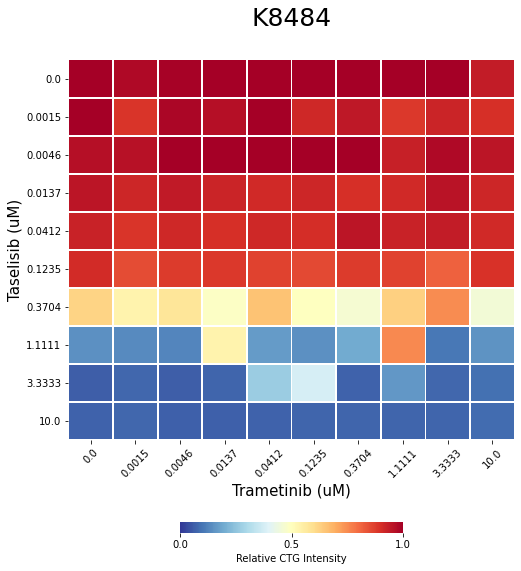

In [222]:
get_heatmap(flip_table(Plate1a),even_drugA,even_drugB,cell_line)

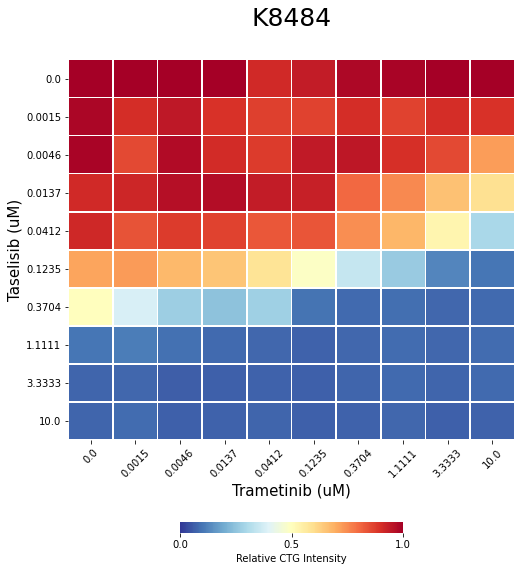

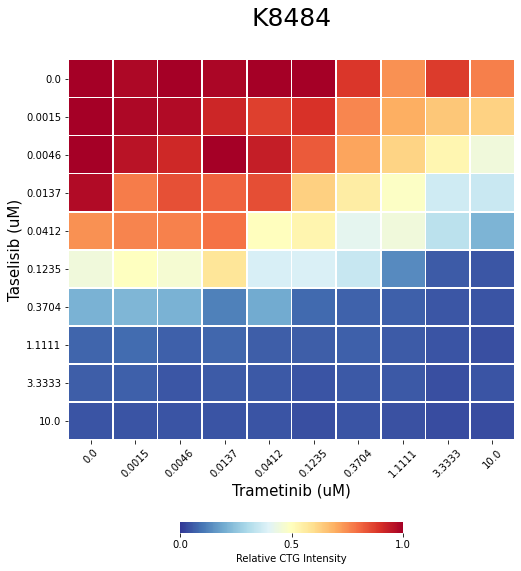

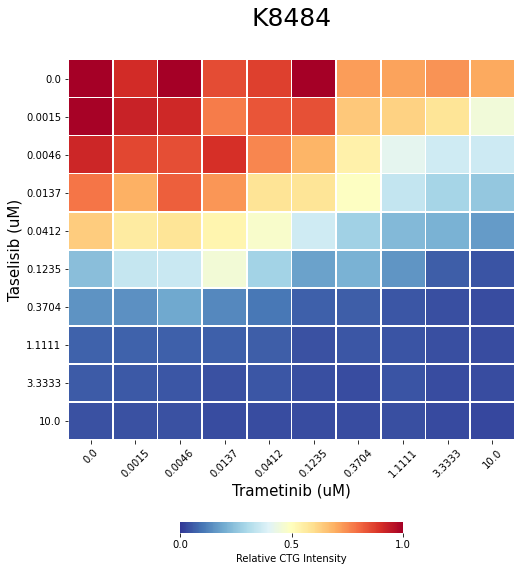

In [200]:
for i in range(3):
    get_heatmap(flip_table(eval('Plate{0}a'.format(i+1))),even_drugA,even_drugB,cell_line)

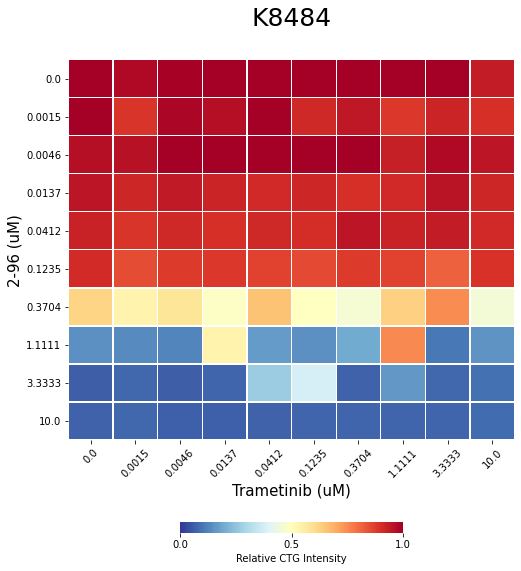

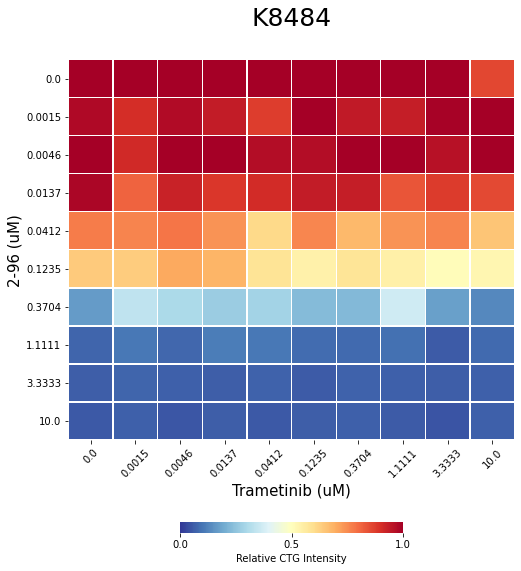

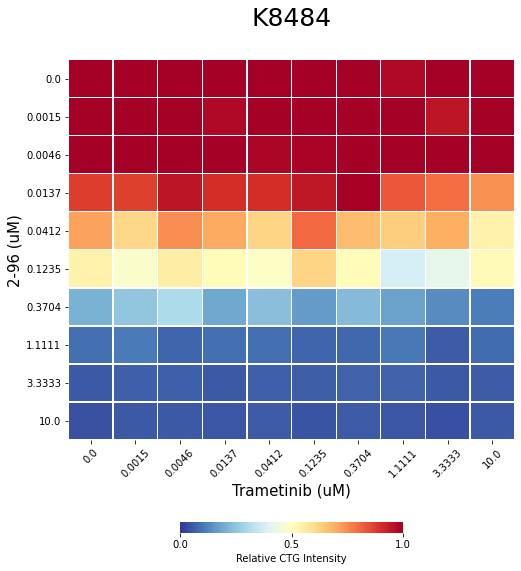

In [210]:
for i in range(3):
    save_heatmap(flip_table(eval('Plate{0}a'.format(i+1))),odd_drugA,odd_drugB,cell_line,str(i))

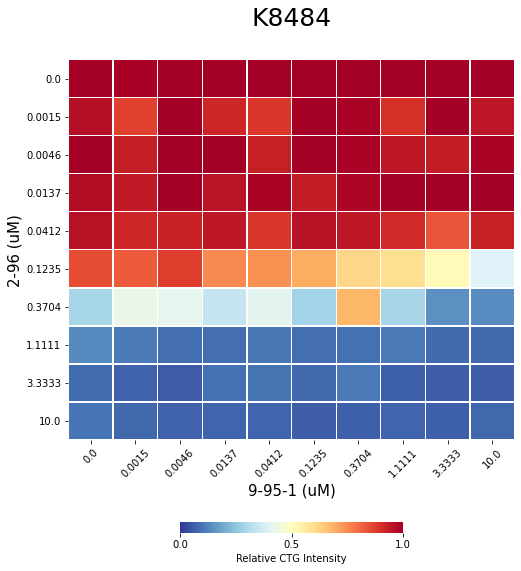

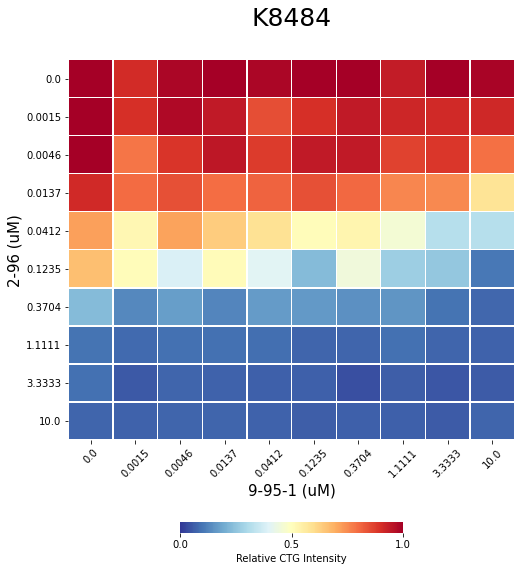

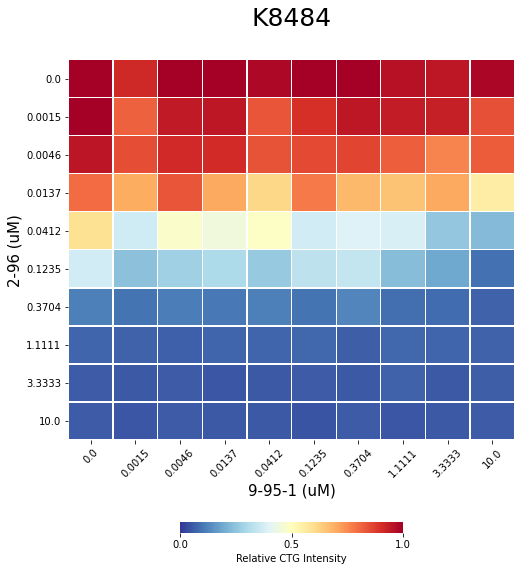

In [211]:
for i in range(3):
    save_heatmap(flip_table(eval('Plate{0}b'.format(i+1))),odd_drugA,odd_drugC,cell_line,str(i))

<AxesSubplot:title={'center':'K8484\n'}, xlabel='Trametinib (uM)', ylabel='Taselisib (uM)'>

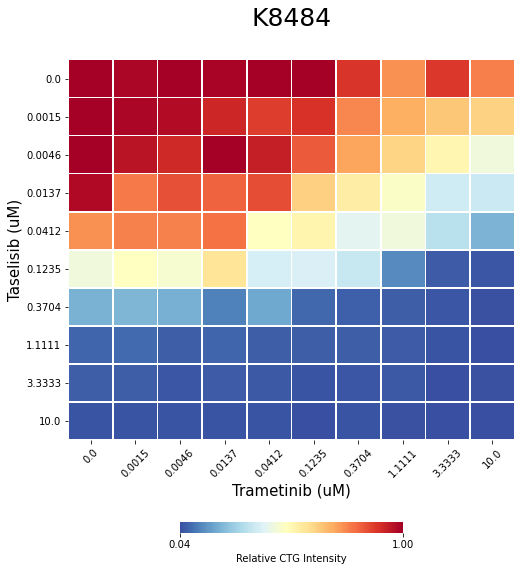

In [136]:
get_heatmap(flip_table(Plate3a),even_drugA,even_drugB,cell_line)

<AxesSubplot:title={'center':'K8484\n'}, xlabel='Trametinib (uM)', ylabel='Taselisib (uM)'>

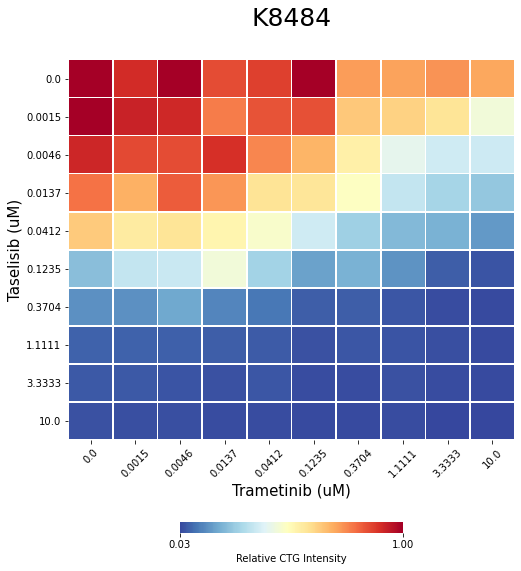

In [137]:
get_heatmap(flip_table(Plate5a),even_drugA,even_drugB,cell_line)